In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

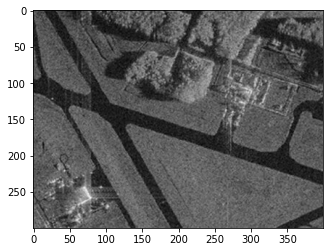

In [4]:
plt.imshow(image_gray, cmap="gray")

# Алгоритм разрастания регионов

In [52]:
import math
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False
    

In [53]:
def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask
        
    return mask*255
    

In [67]:
seed_point = (250,250)
mask = region_growing(image_gray,seed_point,homo_average,1, 10)

3
4
4
5
7
6
6
9
7
6
6
9
13
12
15
17
13
13
16
16
14
16
15
16
10
11
14
13
14
10
10
14
17
15
36
22
21
18
21
21
25
23
43
31
34
23
20
27
29
35
40
32
35
42
48
52
30
23
20
19
19
20
18
22
74
24
26
29
30
27
29
29
28
29
20
17
17
21
20
25
23
24
20
18
19
15
18
18
15
18
13
10
9
7
9
9
10
11
12
10
12
11
8
9
7
4
3
6
6
6
5
5
5
3
2
2
2
1
0


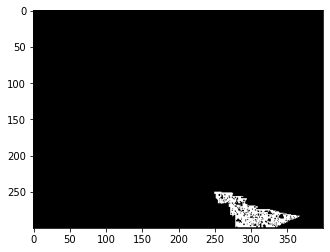

In [68]:
plt.imshow(mask, cmap="gray")

# K-means

In [7]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
# criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [8]:
flags = cv2.KMEANS_RANDOM_CENTERS

In [10]:
z = image_gray.reshape((-1,3))
# convert to np.float32
z = np.float32(z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))

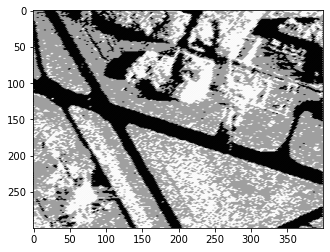

In [11]:
plt.imshow(res2, cmap="gray")

# Watershed+Distance transform

In [5]:
image = cv2.imread('oranges_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

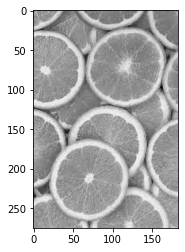

In [6]:
plt.imshow(image_gray, cmap="gray")

In [7]:
ret, thresh = cv2.threshold(image_gray,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

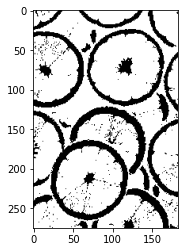

In [8]:
plt.imshow(thresh, cmap="gray")

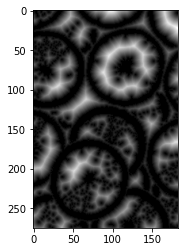

In [9]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5) 
plt.imshow(dist, cmap="gray")

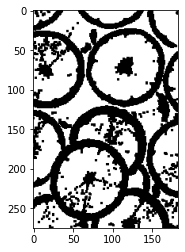

In [11]:
ret, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY) 
plt.imshow(sure_fg, cmap="gray")

In [20]:
sure_fg = sure_fg.astype(np.uint8)

In [21]:
ret, markers = cv2.connectedComponents(sure_fg) 

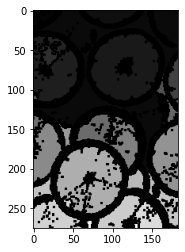

In [22]:
plt.imshow(markers, cmap="gray")

In [30]:
markers = cv2.watershed(image, markers)

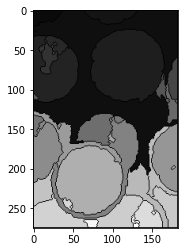

In [34]:
plt.imshow(markers, cmap="gray")

In [35]:
# ДЗ
# 1. Подберите парамтеры алгоритма разрастания регионов так, чтобы был выделен весь участок газона.
# 2. Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.
# 3. Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев.

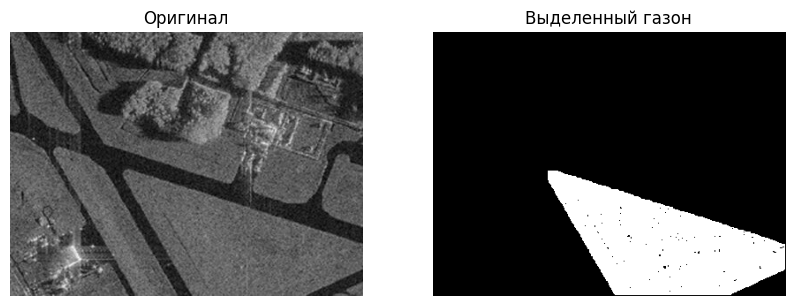

In [6]:
# 1. Подберите парамтеры алгоритма разрастания регионов так, чтобы был выделен весь участок газона.
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False

def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask
        
    return mask*255

seed_point = (158,130)
res = region_growing(image_gray,seed_point,homo_average,1, 25)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_gray, cmap="gray")
plt.title("Оригинал")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(res, cmap='gray')
plt.title("Выделенный газон")
plt.axis('off')
plt.show()

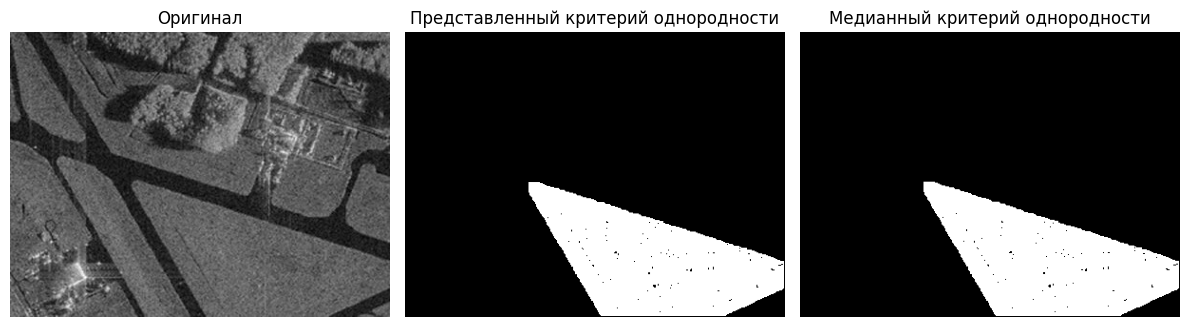

Результаты сравнения:
Представленный критерий однородности: SSIM = 0.0602; MSE = 11060.1966
Медианный критерий однородности: SSIM = 0.0609; MSE = 11059.8672


In [22]:
# 2. Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False

def homo_median(image, mask, point, T):
    if np.count_nonzero(mask > 0) == 0:
        return False
    
    median_val = np.median(image[mask > 0])
    
    if abs(median_val - image[point]) <= T:
        return True
    
    return False
    
def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask
        
    return mask*255

seed_point = (158,130)
res = region_growing(image_gray, seed_point, homo_average, 1, 25)
res_median = region_growing(image_gray, seed_point, homo_median, 1, 25)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(image_gray, cmap="gray")
plt.title("Оригинал")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(res, cmap='gray')
plt.title("Представленный критерий однородности")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(res_median, cmap='gray')
plt.title("Медианный критерий однородности")
plt.axis('off')
plt.tight_layout()
plt.show()

from skimage.metrics import structural_similarity, mean_squared_error

(ssim, _) = structural_similarity(image_gray, res, full=True)
(ssim_median, _) = structural_similarity(image_gray, res_median, full=True)

mse = mean_squared_error(image_gray, res)
mse_median = mean_squared_error(image_gray, res_median)

print("Результаты сравнения:")
print(f"Представленный критерий однородности: SSIM = {ssim:.4f}; MSE = {mse:.4f}")
print(f"Медианный критерий однородности: SSIM = {ssim_median:.4f}; MSE = {mse_median:.4f}")

Вывод: у медианного критерия метрики немного лучше (выше SSIM и ниже MSE), следовательно, сегментация более точная по сравнению с представленным критерием однородности

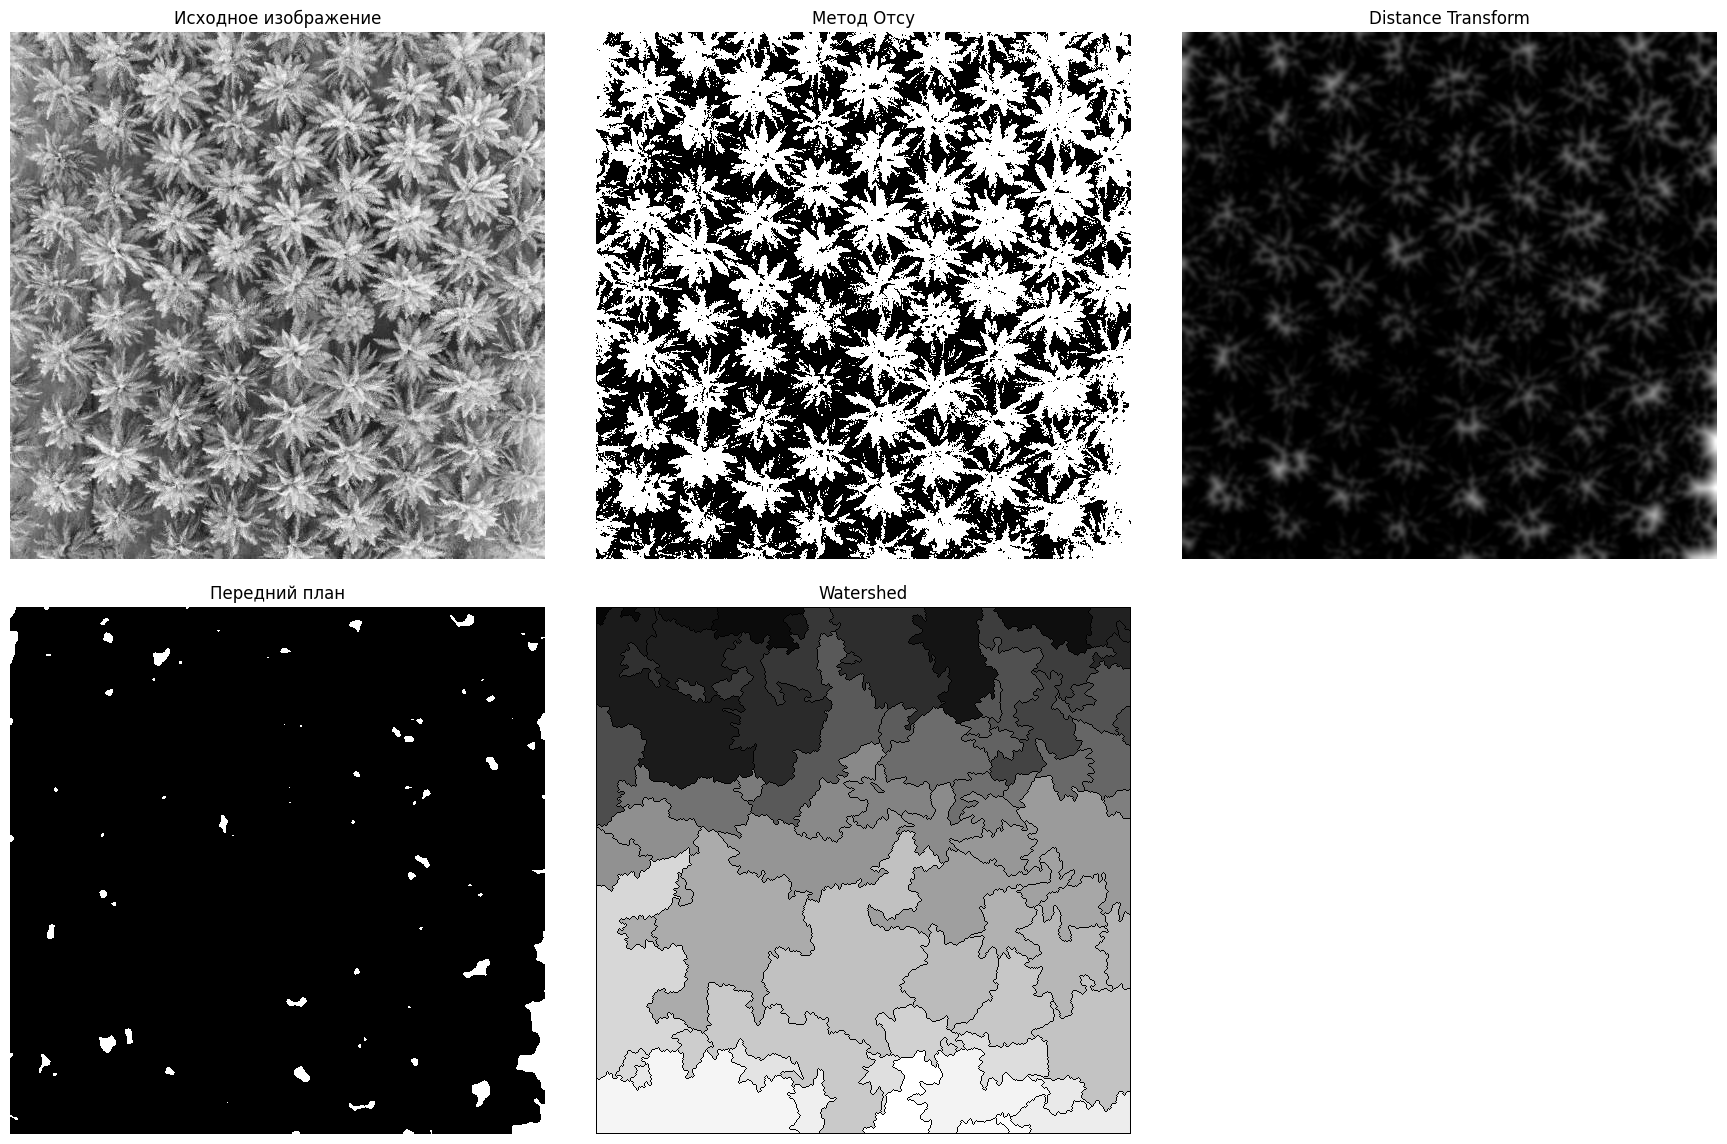

Количество пальм: 81


In [21]:
# 3. Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев.
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('palm_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Бинаризация по Отсу
ret, thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 

# Distance Transform
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5) 
dist_blur = cv2.GaussianBlur(dist, (7,7), 0) 

# Передний план
ret, sure_fg = cv2.threshold(dist_blur, 0.32 * dist_blur.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)

# Watershed
markers = cv2.watershed(image, markers)

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Метод Отсу')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(dist_blur, cmap='gray')
plt.title('Distance Transform')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(sure_fg, cmap='gray')
plt.title('Передний план')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(markers, cmap='gray')
plt.title('Watershed')
plt.axis('off')

plt.tight_layout(pad = 3.0)
plt.show()
print('Количество пальм:', len(np.unique(markers)))